In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_users = pd.read_csv('user_table.csv')
df_home_pg = pd.read_csv('home_page_table.csv')
df_search_pg = pd.read_csv('search_page_table.csv')
df_pay_pg = pd.read_csv('payment_page_table.csv')
df_pay_conf_pg = pd.read_csv('payment_confirmation_table.csv')

Merging dataframes

In [3]:
df_merged = df_users.merge(df_home_pg, on='user_id', how='left', sort=False).merge(df_search_pg, on='user_id', how='left', sort=False).merge(df_pay_pg, on='user_id', how='left', sort=False).merge(df_pay_conf_pg, on='user_id', how='left', sort=False)

Renaming columns

In [4]:
df_merged.columns = ['user_id', 'date', 'device', 'sex', 'home_page', 'search_page', 'payment_page', 'payment_confirmation_page']

In [5]:
df_merged.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


Filling NaN's with 0's, replacing text with 1's, dummifying device column

In [6]:
df_merged.fillna(0, inplace=True)

In [7]:
df_merged['home_page'].replace('home_page', 1, inplace=True)

In [8]:
df_merged['search_page'].replace('search_page', 1, inplace=True)

In [9]:
df_merged['payment_page'].replace('payment_page', 1, inplace=True)

In [10]:
df_merged['payment_confirmation_page'].replace('payment_confirmation_page', 1, inplace=True)

In [11]:
df_merged['mobile'] = pd.get_dummies(df_merged['device'], drop_first=True)

In [12]:
df_merged.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation_page,mobile
0,450007,2015-02-28,Desktop,Female,1,0,0,0,0
1,756838,2015-01-13,Desktop,Male,1,0,0,0,0
2,568983,2015-04-09,Desktop,Male,1,1,0,0,0
3,190794,2015-02-18,Desktop,Female,1,1,0,0,0
4,537909,2015-01-15,Desktop,Male,1,0,0,0,0


Sorting by landing date; earliest: 2015-01-01; latest: 2015-04-30 

In [13]:
df_merged.sort_values(by='date')

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation_page,mobile
44634,602817,2015-01-01,Desktop,Male,1,0,0,0,0
62649,653429,2015-01-01,Desktop,Male,1,0,0,0,0
30040,701366,2015-01-01,Desktop,Male,1,0,0,0,0
30049,309933,2015-01-01,Desktop,Female,1,0,0,0,0
34436,574869,2015-01-01,Desktop,Male,1,1,0,0,0
57966,993501,2015-01-01,Desktop,Male,1,0,0,0,0
44202,955015,2015-01-01,Desktop,Female,1,1,0,0,0
19241,275388,2015-01-01,Desktop,Male,1,0,0,0,0
34423,881745,2015-01-01,Mobile,Female,1,1,0,0,1
4588,71618,2015-01-01,Desktop,Male,1,1,0,0,0


In [14]:
df_merged['date'].max(), df_merged['date'].min()

('2015-04-30', '2015-01-01')

Sanity check: 100% of users visited the home page

In [15]:
1.0 * sum(df_merged['home_page']==1)/len(df_merged)

1.0

50.0% of users visited the search page

In [16]:
1.0*sum(df_merged['search_page']==1)/len(df_merged)

0.5

6.7% of users visited the payment page; 13.3% of users who visited the search page went on to the payment page

In [17]:
1.0*sum(df_merged['payment_page']==1)/len(df_merged)

0.06670353982300885

In [18]:
1.0*sum(df_merged['payment_page']==1)/sum(df_merged['search_page']==1)

0.1334070796460177

0.5% of users visited the payment confirmation page; 7.5% of users who visited the payment page went on to the payment confirmation page 

In [19]:
1.0*sum(df_merged['payment_confirmation_page']==1)/len(df_merged)

0.005

In [20]:
1.0*sum(df_merged['payment_confirmation_page']==1)/sum(df_merged['payment_page']==1)

0.07495854063018242

In [21]:
search_pg_all = df_merged[df_merged['search_page']==1]

In [22]:
payment_pg_all = df_merged[df_merged['payment_page']==1]

In [23]:
payment_confirmation_pg_all = df_merged[df_merged['payment_confirmation_page']==1]

Of the users that visited the home page, 33.4% (30200) were mobile users and 66.6% (60200) were desktop users (50.0% (45200) went on to visit the search page)

In [24]:
sum(df_merged['mobile']==1), 1.0*sum(df_merged['mobile']==1)/len(df_merged), sum(df_merged['mobile']==0), 1.0*sum(df_merged['mobile']==0)/len(df_merged)

(30200, 0.334070796460177, 60200, 0.665929203539823)

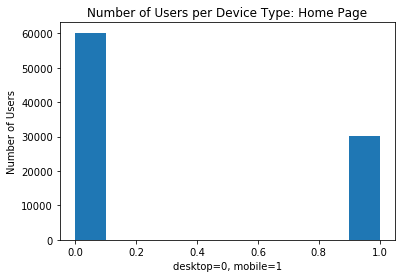

In [25]:
plt.hist(df_merged['mobile'])
plt.xlabel('desktop=0, mobile=1')
plt.ylabel('Number of Users')
plt.title('Number of Users per Device Type: Home Page')
plt.show()

Of the users that visited the search page, 33.4% (15100) were mobile users and 66.6% (30100) were desktop users (13.3% (6030) went on to visit the payment page)

In [26]:
sum(search_pg_all['mobile']==1), 1.0*sum(search_pg_all['mobile']==1)/len(search_pg_all), sum(search_pg_all['mobile']==0), 1.0*sum(search_pg_all['mobile']==0)/len(search_pg_all)

(15100, 0.334070796460177, 30100, 0.665929203539823)

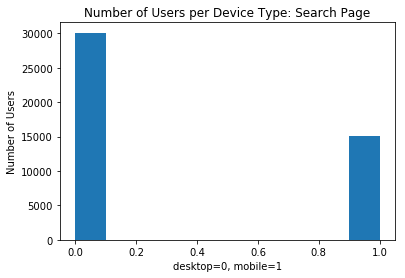

In [27]:
plt.hist(search_pg_all['mobile'])
plt.xlabel('desktop=0, mobile=1')
plt.ylabel('Number of Users')
plt.title('Number of Users per Device Type: Search Page')
plt.show()

Of the users that visited the payment page, 50.1% (3020) were mobile users and 49.9% (3010) were desktop users (7.5% (452) went on to visit the payment confirmation page)

In [28]:
sum(payment_pg_all['mobile']==1), 1.0*sum(payment_pg_all['mobile']==1)/len(payment_pg_all), sum(payment_pg_all['mobile']==0), 1.0*sum(payment_pg_all['mobile']==0)/len(payment_pg_all)

(3020, 0.5008291873963516, 3010, 0.49917081260364843)

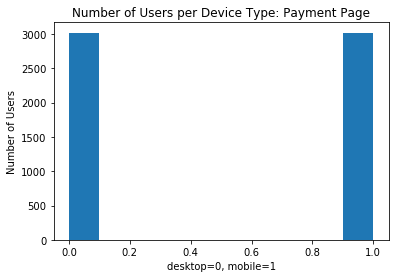

In [29]:
plt.hist(payment_pg_all['mobile'])
plt.xlabel('desktop=0, mobile=1')
plt.ylabel('Number of Users')
plt.title('Number of Users per Device Type: Payment Page')
plt.show()

Of the users that visited the payment confirmation page, 66.8% (302) were mobile users and 33.2% (150) were desktop users

In [30]:
sum(payment_confirmation_pg_all['mobile']==1), 1.0*sum(payment_confirmation_pg_all['mobile']==1)/len(payment_confirmation_pg_all), sum(payment_confirmation_pg_all['mobile']==0), 1.0*sum(payment_confirmation_pg_all['mobile']==0)/len(payment_confirmation_pg_all)

(302, 0.668141592920354, 150, 0.33185840707964603)

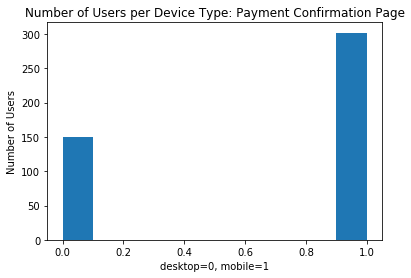

In [31]:
plt.hist(payment_confirmation_pg_all['mobile'])
plt.xlabel('desktop=0, mobile=1')
plt.ylabel('Number of Users')
plt.title('Number of Users per Device Type: Payment Confirmation Page')
plt.show()

In [32]:
len(df_merged)

90400